# Simple HRNet
This is a light Google Colab notebook showing how to use the [simple-HRNet](https://github.com/stefanopini/simple-HRNet) repository.

It includes the conversion to TensorRT and a test of the converted model.
Please skip the section "TensorRT" if not interested.

Initial idea of running on Google Colab by @basicvisual, initial implementation by @wuyenlin (see [issue #84](https://github.com/stefanopini/simple-HRNet/issues/84)).

## Pytorch

### Clone the repo and install the dependencies

In [ ]:
# clone the repo
!git clone https://github.com/stefanopini/simple-HRNet.git

In [ ]:
%cd simple-HRNet
!pwd

In [ ]:
# install requirements
!pip install -r requirements.txt

In [ ]:
# install vlc to get video codecs
!apt install vlc

### Add yolov3
Clone yolov3 for multiprocessing support. This can be skipped for single-person applications or if you plan to use YOLO v5 by Ultralytics.

In [ ]:
# download git submodules
!git submodule update --init --recursive

In [ ]:
%cd /content/simple-HRNet/models_/detectors/yolo
!pip install -q -r requirements.txt

%cd /content/simple-HRNet

In [ ]:
%cd /content/simple-HRNet/models_/detectors/yolo/weights
!sh download_weights.sh

%cd /content/simple-HRNet

### Download HRNet pre-trained weights and test video

Download any of the supported official weights listed [here](https://github.com/stefanopini/simple-HRNet/#installation-instructions).

In the following, we download the weights `pose_hrnet_w48_384x288.pth` from the official Drive link.
Download of other weights (e.g. `pose_hrnet_w32_256x192.pth`) as well as weights from private Drives is supported too.

In [ ]:
!pip install --upgrade --no-cache-dir gdown

In [ ]:
# download weights

# create weights folder
%cd /content/simple-HRNet
!mkdir weights
%cd /content/simple-HRNet/weights

# download weights pose_hrnet_w48_384x288.pth
!gdown 1UoJhTtjHNByZSm96W3yFTfU5upJnsKiS

# download weights pose_hrnet_w32_256x192.pth
!gdown 1zYC7go9EV0XaSlSBjMaiyE_4TcHc_S38

# download weights pose_hrnet_w32_256x256.pth
!gdown 1_wn2ifmoQprBrFvUCDedjPON4Y6jsN-v

# # download weights from your own Google Drive
# from glob import glob
# from google.colab import drive
# drive.mount('/content/drive')
# w_list = glob("/content/drive/<your drive folder>/*.pth")
# if not w_list:
#   raise FileNotFoundError("You haven't downloaded any pre-trained weights!")

%cd /content/simple-HRNet

In [ ]:
# download a publicly available video (or just get your own)
!wget https://commondatastorage.googleapis.com/gtv-videos-bucket/sample/WeAreGoingOnBullrun.mp4

### Test the API


In [ ]:
import cv2
import requests
import matplotlib.pyplot as plt
import torch
from skimage import io
from PIL import Image
from SimpleHRNet import SimpleHRNet

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # singleperson, COCO weights
# model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", multiperson=False, device=device)

# # multiperson w/ YOLOv3, COCO weights
# model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", device=device)

# # multiperson w/ YOLOv3, COCO weights, small model
# model = SimpleHRNet(32, 17, "./weights/pose_hrnet_w32_256x192.pth", device=device)

# # multiperson w/ YOLOv3, MPII weights
# model = SimpleHRNet(32, 16, "./weights/pose_hrnet_w32_256x256.pth", device=device)

# # multiperson w/ YOLOv5 (medium), COCO weights
# model = SimpleHRNet(48, 17, "./weights/pose_hrnet_w48_384x288.pth", yolo_version='v5', yolo_model_def='yolov5m', device=device)

# multiperson w/ YOLOv5 nano, COCO weights, small model
model = SimpleHRNet(32, 17, "./weights/pose_hrnet_w32_256x192.pth", yolo_version='v5', yolo_model_def='yolov5n', device=device)

url = '/content/png-clipart-ikon-smart-80p-man-standing-posing-for-thumbnail.png'
im = Image.open(url)
image = io.imread(url)

joints = model.predict(image)

device: 'cuda' - 1 GPU(s) will be used


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-19 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded


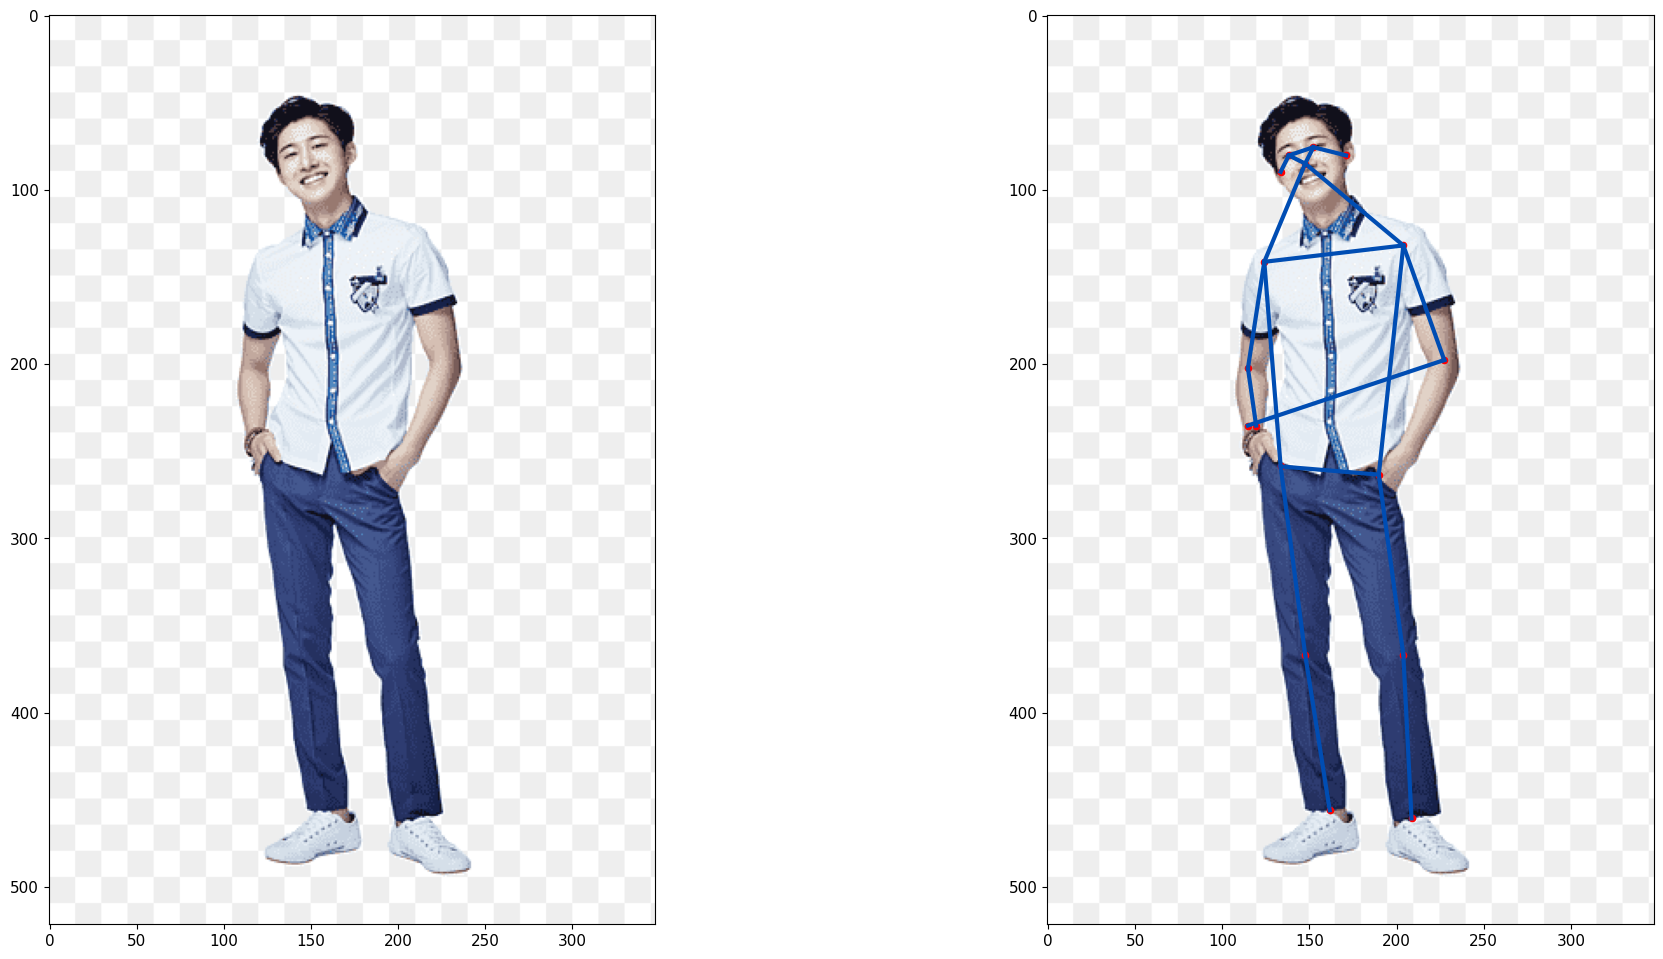

In [ ]:
%matplotlib inline
from misc.visualization import joints_dict

def plot_joints(ax, output):
    bones = joints_dict()["coco"]["skeleton"]
    # bones = joints_dict()["mpii"]["skeleton"]

    for bone in bones:
        xS = [output[:,bone[0],1], output[:,bone[1],1]]
        yS = [output[:,bone[0],0], output[:,bone[1],0]]
        ax.plot(xS, yS, linewidth=3, c=(0,0.3,0.7))
    ax.scatter(joints[:,:,1],joints[:,:,0], s=20, c='r')

fig = plt.figure(figsize=(60/2.54, 30/2.54))
ax = fig.add_subplot(121)
ax.imshow(Image.open(url))
ax = fig.add_subplot(122)
ax.imshow(Image.open(url))
plot_joints(ax, joints)
plt.show()

In [ ]:
%cd yolov5/


[Errno 2] No such file or directory: 'yolov5/'
/content/simple-HRNet


In [ ]:
%cd yolov5/


[Errno 2] No such file or directory: 'yolov5/'
/content/simple-HRNet


In [ ]:
!python train.py --img 640 --batch 16 --epochs 10 --data ../PenDataset/data.yaml --weights yolov5s.pt --cache


python3: can't open file '/content/simple-HRNet/train.py': [Errno 2] No such file or directory
